In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.dates as mdates
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [628]:
df = pd.read_csv("/Users/a123/Desktop/CMU/Capstone/CRS-Detection/Datasets/final_data_clipped.csv")
df.head(5)

/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_77750/1396069146.py:1: DtypeWarning: Columns (38,51,53,54,84,108,122,139,142,159,160,161) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/a123/Desktop/CMU/Capstone/CRS-Detection/Datasets/final_data_clipped.csv")


,Unnamed: 0,patient_id,pr_display,spo2_display,resp_display,pulse_rate_obscount,pulse_rate_avg,pulse_rate_min,pulse_rate_max,pulse_rate_iqr,...,QC Deviation from median.1,Weight at time of infusion,precise_datetime,CRS intervention,CRS Grade (nurse),Temperature,SpO2,BP,HR,Temperature_C
0,0,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.047985,74.325238,2022-10-21 08:00:00.000000000,Tocilizumab x 1 on 1/22/24,1.0,100.9,WNL,WNL,WNL,38.277778
1,1,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.047985,74.325238,2022-10-21 08:00:00.000000000,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.048813,74.325238,2022-10-21 08:14:32.727272704,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.049641,74.325238,2022-10-21 08:29:05.454545408,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7001,71 beats/min,96%,17%,10.0,70.01,66.63,71.52,2.88,...,0.050469,74.325238,2022-10-21 08:43:38.181818112,Tocilizumab x 1 on 1/22/24,NaN,NaN,NaN,NaN,NaN,NaN


In [629]:
df[(df.patient_id == 7005)&(df['CRS on date (0 No, 1 Yes)']==1)][['patient_id',"CRS on date (0 No, 1 Yes)",'datetime','Agent (JNJ/BMS/Caribou)']]

,patient_id,"CRS on date (0 No, 1 Yes)",datetime,Agent (JNJ/BMS/Caribou)
64025,7005,1,2022-12-14 20:01:00,JNJ OOS
64026,7005,1,2022-12-14 20:02:00,JNJ OOS
64027,7005,1,2022-12-14 20:03:00,JNJ OOS
64028,7005,1,2022-12-14 20:04:00,JNJ OOS
64029,7005,1,2022-12-14 20:05:00,JNJ OOS
...,...,...,...,...
65009,7005,1,2022-12-15 19:56:00,JNJ OOS
65010,7005,1,2022-12-15 19:57:00,JNJ OOS
65011,7005,1,2022-12-15 19:58:00,JNJ OOS
65012,7005,1,2022-12-15 19:59:00,JNJ OOS


In [630]:
list(df.columns)

['Unnamed: 0',
 'patient_id',
 'pr_display',
 'spo2_display',
 'resp_display',
 'pulse_rate_obscount',
 'pulse_rate_avg',
 'pulse_rate_min',
 'pulse_rate_max',
 'pulse_rate_iqr',
 'spo2_obscount',
 'spo2_avg',
 'spo2_min',
 'spo2_max',
 'respiratory_rate_obscount',
 'respiratory_rate_avg',
 'respiratory_rate_min',
 'respiratory_rate_max',
 'covered_skin_temperature_obscount',
 'covered_skin_temperature_avg',
 'covered_skin_temperature_min',
 'covered_skin_temperature_max',
 'covered_axil_temperature_obscount',
 'covered_axil_temperature_avg',
 'covered_axil_temperature_min',
 'covered_axil_temperature_max',
 'motion_obscount',
 'motion_avg',
 'step_count_sum',
 'step_count_obscount',
 'time',
 'datetime',
 'PT_ID',
 'Sample ID',
 'Agent (JNJ/BMS/Caribou)',
 'Date of CAR-T infusion',
 'Age',
 'Date of Sample',
 'Days in relation to CAR-T  infusion',
 'Patient experienced CRS at any point (Yes/No)',
 'CRS on date (0 No, 1 Yes)',
 'CRS Grade ',
 'ICANs on date (0 -no, 1 yes)',
 'TOCI give

In [631]:
complete_set = ['PT_ID','CRS on date (0 No, 1 Yes)','Agent (JNJ/BMS/Caribou)','datetime', 'spo2_avg', 'pulse_rate_avg','respiratory_rate_avg', 'covered_skin_temperature_avg','covered_axil_temperature_avg','Highest Ferritin',
 'Highest CRP','IL8',
 'TNFRSF9',
 'TIE2',
 'MCP-3',
 'CD40-L',
 'IL-1 alpha',
 'CD244',
 'EGF',
 'ANGPT1',
 'IL7',
 'PGF',
 'IL6',
 'ADGRG1',
 'MCP-1',
 'CRTAM',
 'CXCL11',
 'MCP-4',
 'TRAIL',
 'FGF2',
 'CXCL9',
 'CD8A',
 'CAIX',
 'MUC-16',
 'ADA',
 'CD4',
 'NOS3',
 'IL2',
 'Gal-9',
 'VEGFR-2',
 'CD40',
 'IL18',
 'GZMH',
 'KIR3DL1',
 'LAP TGF-beta-1',
 'CXCL1',
 'TNFSF14',
 'IL33',
 'TWEAK',
 'PDGF subunit B',
 'PDCD1',
 'FASLG',
 'CD28',
 'CCL19',
 'MCP-2',
 'CCL4',
 'IL15',
 'Gal-1',
 'PD-L1',
 'CD27',
 'CXCL5',
 'IL5',
 'HGF',
 'GZMA',
 'HO-1',
 'CX3CL1',
 'CXCL10',
 'CD70',
 'IL10',
 'TNFRSF12A',
 'CCL23',
 'CD5',
 'CCL3',
 'MMP7',
 'ARG1',
 'NCR1',
 'DCN',
 'TNFRSF21',
 'TNFRSF4',
 'MIC-A/B',
 'CCL17',
 'ANGPT2',
 'PTN',
 'CXCL12',
 'IFN-gamma',
 'LAMP3',
 'CASP-8',
 'ICOSLG',
 'MMP12',
 'CXCL13',
 'PD-L2',
 'VEGFA',
 'IL4',
 'LAG3',
 'IL12RB1',
 'IL13',
 'CCL20',
 'TNF',
 'KLRD1',
 'GZMB',
 'CD83',
 'IL12',
 'CSF-1',]

In [632]:
columns_test_1 = ['PT_ID','CRS on date (0 No, 1 Yes)','Agent (JNJ/BMS/Caribou)','datetime', 'spo2_avg', 'pulse_rate_avg','respiratory_rate_avg', 'covered_skin_temperature_avg','IL8','IL6','CXCL10','IFN-gamma','CCL23', 'CASP-8',
 'CXCL13'] 
df_subset = df[columns_test_1]
df_subset.head(5)

,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,IL8,IL6,CXCL10,IFN-gamma,CCL23,CASP-8,CXCL13
0,7001,0,BMS,2022-01-21 23:30:00,97.83,70.01,24.35,27.650,5.570850,4.754540,9.135090,5.938620,10.893300,4.387440,6.721580
1,7001,1,BMS,2022-10-21 16:02:00,97.83,70.01,24.35,27.650,5.570850,4.754540,9.135090,5.938620,10.893300,4.387440,6.721580
2,7001,1,BMS,2022-10-21 16:03:00,97.83,70.01,19.86,27.735,5.575702,4.773422,9.158341,6.003697,10.897528,4.403390,6.724164
3,7001,1,BMS,2022-10-21 17:42:00,97.83,70.01,15.37,27.820,5.580553,4.792303,9.181591,6.068774,10.901756,4.419340,6.726747
4,7001,1,BMS,2022-10-21 17:43:00,97.83,70.01,11.77,27.780,5.585405,4.811185,9.204842,6.133852,10.905983,4.435289,6.729331


In [633]:
df_JNJ = df_subset[(df_subset['Agent (JNJ/BMS/Caribou)']=='JNJ') | (df_subset['Agent (JNJ/BMS/Caribou)']=='JNJ OOS')]
df_BMS = df_subset[(df_subset['Agent (JNJ/BMS/Caribou)']=='BMS')]

In [634]:
# Individualize the data
# Create a baseline dataframe
data = df_JNJ.copy()

baseline = data.groupby('PT_ID').first().reset_index()

# Subtract the baseline values for numeric columns
columns_to_individualize = [col for col in columns_test_1 if col not in ['PT_ID', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)','datetime']]

for col in columns_to_individualize:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col] - data.groupby('PT_ID')[col].transform('first')

data.head()


,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,IL8,IL6,CXCL10,IFN-gamma,CCL23,CASP-8,CXCL13
42639,7004,0,JNJ,2022-12-05 15:44:00,0.0,0.0,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42640,7004,0,JNJ,2022-12-05 15:45:00,0.0,0.0,0.000,0.00,0.002603,-0.000316,-0.001205,-0.000085,-0.000287,-0.005952,-0.000051
42641,7004,0,JNJ,2022-12-05 15:46:00,0.0,0.0,7.210,0.01,0.005205,-0.000633,-0.002410,-0.000171,-0.000574,-0.011904,-0.000102
42642,7004,0,JNJ,2022-12-05 15:47:00,0.0,0.0,4.605,0.08,0.007808,-0.000949,-0.003616,-0.000256,-0.000861,-0.017857,-0.000153
42643,7004,0,JNJ,2022-12-05 15:48:00,0.0,0.0,2.000,0.02,0.010410,-0.001265,-0.004821,-0.000342,-0.001148,-0.023809,-0.000203


In [635]:
data[(data.PT_ID == 7005)&(data['CRS on date (0 No, 1 Yes)']==1)][["CRS on date (0 No, 1 Yes)",'datetime']]

,"CRS on date (0 No, 1 Yes)",datetime
64025,1,2022-12-14 20:01:00
64026,1,2022-12-14 20:02:00
64027,1,2022-12-14 20:03:00
64028,1,2022-12-14 20:04:00
64029,1,2022-12-14 20:05:00
...,...,...
65009,1,2022-12-15 19:56:00
65010,1,2022-12-15 19:57:00
65011,1,2022-12-15 19:58:00
65012,1,2022-12-15 19:59:00


In [636]:
data[(data.PT_ID == 7005)&(pd.to_datetime(data['datetime'])>pd.to_datetime("2022-12-14 21:05:00"))][["CRS on date (0 No, 1 Yes)",'datetime']]

,"CRS on date (0 No, 1 Yes)",datetime
64086,1,2022-12-14 23:27:00
64087,1,2022-12-14 23:28:00
64088,1,2022-12-14 23:29:00
64089,1,2022-12-14 23:30:00
64090,1,2022-12-14 23:31:00
...,...,...
69885,0,2022-12-20 15:53:00
69886,0,2022-12-20 15:54:00
69887,0,2022-12-20 15:55:00
69888,0,2022-12-20 15:56:00


In [637]:
# # String handling

# # Replace '>33500' with a numeric value, e.g., 33500
# data['Highest Ferritin'] = data['Highest Ferritin'].replace('>33500', '33500')

# # Convert the column to numeric, coercing invalid values to NaN
# data['Highest Ferritin'] = pd.to_numeric(data['Highest Ferritin'], errors='coerce')
# print(data['Highest Ferritin'].dtype)  # Should now be float64


# data['IL2'] = data['IL2'].replace('No Data', np.nan)
# data['IL2'] = pd.to_numeric(data['IL2'], errors='coerce')

# data['IL5'] = data['IL5'].replace('No Data', np.nan)
# data['IL5'] = pd.to_numeric(data['IL5'], errors='coerce')

# data['NCR1'] = data['NCR1'].replace('No Data', np.nan)
# data['NCR1'] = pd.to_numeric(data['NCR1'], errors='coerce')

# data['IL4'] = data['IL4'].replace('No Data', np.nan)
# data['IL4'] = pd.to_numeric(data['IL4'], errors='coerce')

# data['IL13'] = data['IL13'].replace('No Data', np.nan)
# data['IL13'] = pd.to_numeric(data['IL13'], errors='coerce')


In [638]:
# Define the window size for rolling statistics (e.g., past 6 hours)
window_size = 6
lag_size = 6
time_interval = 30

# Sort data by patient ID and datetime
data = data.sort_values(by=['PT_ID', 'datetime'])

# Function to create lagged features and rolling statistics
def add_past_features(data, columns,lag_size):
    for col in columns:
        print(col)
        # Add lagged values 
        for lag_base in range(1, lag_size + 1):
            lag = lag_base * time_interval
            data[f'{col}_lag_{lag}'] = data.groupby('PT_ID')[col].shift(lag)
        
        rolling_size = lag_size * time_interval
        # Add rolling statistics
        data[f'{col}_rolling_mean_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).mean().reset_index(level=0, drop=True)
        data[f'{col}_rolling_std_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).std().reset_index(level=0, drop=True)
        data[f'{col}_rolling_min_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).min().reset_index(level=0, drop=True)
        data[f'{col}_rolling_max_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).max().reset_index(level=0, drop=True)


    return data

# Add past features for selected columns
columns_to_process = [col for col in columns_test_1 if col not in ['PT_ID','CRS on date (0 No, 1 Yes)','Agent (JNJ/BMS/Caribou)','datetime']]
data = add_past_features(data, columns_to_process, lag_size)


spo2_avg
pulse_rate_avg
respiratory_rate_avg
covered_skin_temperature_avg
IL8
IL6
CXCL10
IFN-gamma
CCL23
CASP-8
CXCL13


/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_77750/2919018855.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{col}_rolling_std_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).std().reset_index(level=0, drop=True)
/var/folders/9q/_q_h4th94vj56dq6c3yv3gj80000gn/T/ipykernel_77750/2919018855.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{col}_rolling_min_{rolling_size}'] = data.groupby('PT_ID')[col].rolling(rolling_size, min_periods=1).min().reset_index(leve

In [639]:
#data = data[['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)','GZMB_rolling_min_180', 'MMP12_lag_90', 'CCL20_lag_180', 'PTN_rolling_std_180', 'CXCL10_lag_150', 'pulse_rate_avg_rolling_std_180', 'covered_skin_temperature_avg', 'IFN-gamma_rolling_min_180', 'IL15', 'CXCL13_rolling_std_180', 'spo2_avg_rolling_std_180', 'IFN-gamma', 'IFN-gamma_rolling_max_180', 'IL15_lag_60', 'EGF', 'KLRD1_rolling_min_180', 'VEGFA_lag_30', 'IL18_rolling_max_180', 'HO-1_lag_180', 'CXCL13_rolling_min_180', 'CASP-8_rolling_max_180', 'CD8A_lag_30', 'IL8', 'CD8A_rolling_min_180', 'PDCD1_rolling_std_180', 'respiratory_rate_avg_lag_30', 'CRTAM', 'MMP12_rolling_max_180', 'CXCL9_rolling_std_180', 'CCL20_rolling_std_180', 'VEGFA_lag_60', 'covered_axil_temperature_avg_lag_180', 'IL7_rolling_std_180', 'IL15_lag_90', 'pulse_rate_avg_lag_180', 'IL5_rolling_max_180', 'CD8A_rolling_max_180', 'GZMH_lag_180', 'IL12', 'TIE2_lag_90', 'spo2_avg_rolling_mean_180', 'IL15_lag_180', 'pulse_rate_avg_lag_150', 'KIR3DL1', 'CRTAM_lag_90', 'MMP7_rolling_std_180', 'CXCL11_lag_30', 'CD8A_lag_180', 'covered_axil_temperature_avg_rolling_max_180', 'respiratory_rate_avg_lag_120', 'CXCL5', 'covered_axil_temperature_avg_lag_150', 'IL15_lag_30', 'MMP12_lag_120', 'LAG3_lag_150', 'spo2_avg', 'CD8A_rolling_std_180', 'covered_skin_temperature_avg_rolling_mean_180', 'respiratory_rate_avg_rolling_mean_180', 'covered_skin_temperature_avg_lag_180', 'PTN', 'IL5_rolling_mean_180', 'respiratory_rate_avg_lag_180', 'spo2_avg_lag_120', 'MCP-2_rolling_std_180', 'HO-1_lag_120', 'Highest Ferritin_lag_60', 'covered_axil_temperature_avg', 'Highest Ferritin_rolling_std_180', 'TIE2_rolling_min_180', 'CXCL11_lag_180', 'CD244_lag_30']]

In [640]:
data.shape

(173156, 125)

In [641]:
from datetime import timedelta

def assign_crs_in_6_hours(data):
    """
    Assign CRS_in_6_hours for each row based on whether `datetime + 6 hours` falls within a CRS occurrence time frame.

    Parameters:
        data (DataFrame): Input DataFrame with 'PT_ID', 'datetime', and 'CRS on date (0 No, 1 Yes)' columns.

    Returns:
        DataFrame: Updated DataFrame with a new column 'CRS_in_6_hours'.
    """
    # Ensure 'datetime' is a datetime object
    data['datetime'] = pd.to_datetime(data['datetime'])
    data = data.sort_values(by=['PT_ID', 'datetime'])

    # Initialize a new column
    data['CRS_in_6_hours'] = 0

    # Process each patient group separately
    for pt_id, group in data.groupby('PT_ID'):
        # Sort by datetime for the current patient
        group = group.sort_values('datetime')

        # Identify CRS occurrence start and end timeframes
        crs_start = group.index[(group['CRS on date (0 No, 1 Yes)'].shift(1) == 0) &
                                (group['CRS on date (0 No, 1 Yes)'] == 1)].tolist()
        crs_end = group.index[(group['CRS on date (0 No, 1 Yes)'].shift(1) == 1) &
                              (group['CRS on date (0 No, 1 Yes)'] == 0)].tolist()

        # If a CRS event starts but does not end, assume it continues until the last datetime
        if len(crs_start) > len(crs_end):
            crs_end.append(group.index[-1])

        # Assign CRS_in_6_hours for each row
        for start_idx, end_idx in zip(crs_start, crs_end):
            crs_start_time = group.loc[start_idx, 'datetime']
            crs_end_time = group.loc[end_idx, 'datetime']
            
            # Any datetime + 6 hours within the CRS occurrence timeframe is set to 1
            within_crs_timeframe = (group['datetime'] + timedelta(hours=6) >= crs_start_time) & \
                                   (group['datetime'] + timedelta(hours=6) <= crs_end_time)
            data.loc[group[within_crs_timeframe].index, 'CRS_in_6_hours'] = 1

    return data

# Apply the function to your dataset
data = assign_crs_in_6_hours(data)


In [642]:
data.shape

(173156, 126)

In [643]:
data[data['CRS_in_6_hours']==1]

,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,IL8,IL6,...,CXCL13_lag_60,CXCL13_lag_90,CXCL13_lag_120,CXCL13_lag_150,CXCL13_lag_180,CXCL13_rolling_mean_180,CXCL13_rolling_std_180,CXCL13_rolling_min_180,CXCL13_rolling_max_180,CRS_in_6_hours
63665,7005,0,JNJ OOS,2022-12-14 14:01:00,-2.255,33.12,-1.07,5.76,0.889360,1.249300,...,0.801890,0.801890,0.801890,0.801890,0.801890,0.801890,0.000000,0.801890,0.801890,1
63666,7005,0,JNJ OOS,2022-12-14 14:02:00,-1.820,34.77,1.08,5.77,0.889360,1.249300,...,0.801890,0.801890,0.801890,0.801890,0.801890,0.801890,0.000000,0.801890,0.801890,1
63667,7005,0,JNJ OOS,2022-12-14 14:03:00,-1.820,35.61,3.29,5.79,0.889360,1.249300,...,0.801890,0.801890,0.801890,0.801890,0.801890,0.801890,0.000000,0.801890,0.801890,1
63668,7005,0,JNJ OOS,2022-12-14 14:04:00,-2.820,33.46,-1.34,5.79,0.889360,1.249300,...,0.801890,0.801890,0.801890,0.801890,0.801890,0.801890,0.000000,0.801890,0.801890,1
63669,7005,0,JNJ OOS,2022-12-14 14:05:00,-1.820,32.59,0.79,5.79,0.889360,1.249300,...,0.801890,0.801890,0.801890,0.801890,0.801890,0.801890,0.000000,0.801890,0.801890,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313952,7028,1,JNJ,2023-10-06 01:57:00,7.810,-71.03,4.07,0.24,1.956020,3.989555,...,0.361414,0.360956,0.360498,0.360041,0.359583,0.360964,0.000795,0.359599,0.362329,1
313953,7028,1,JNJ,2023-10-06 01:58:00,8.800,-71.32,2.84,0.28,1.957046,3.991666,...,0.361429,0.360971,0.360514,0.360056,0.359599,0.360979,0.000795,0.359614,0.362344,1
313954,7028,1,JNJ,2023-10-06 01:59:00,8.380,-72.11,6.42,0.27,1.958072,3.993777,...,0.361444,0.360987,0.360529,0.360071,0.359614,0.360994,0.000795,0.359629,0.362359,1
313955,7028,1,JNJ,2023-10-06 02:00:00,5.730,-70.87,3.42,0.27,1.959099,3.995888,...,0.361459,0.361002,0.360544,0.360087,0.359629,0.361009,0.000795,0.359644,0.362374,1


In [644]:
data[data['CRS_in_6_hours']==1].head(10)

,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,IL8,IL6,...,CXCL13_lag_60,CXCL13_lag_90,CXCL13_lag_120,CXCL13_lag_150,CXCL13_lag_180,CXCL13_rolling_mean_180,CXCL13_rolling_std_180,CXCL13_rolling_min_180,CXCL13_rolling_max_180,CRS_in_6_hours
63665,7005,0,JNJ OOS,2022-12-14 14:01:00,-2.255,33.12,-1.07,5.76,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63666,7005,0,JNJ OOS,2022-12-14 14:02:00,-1.820,34.77,1.08,5.77,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63667,7005,0,JNJ OOS,2022-12-14 14:03:00,-1.820,35.61,3.29,5.79,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63668,7005,0,JNJ OOS,2022-12-14 14:04:00,-2.820,33.46,-1.34,5.79,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63669,7005,0,JNJ OOS,2022-12-14 14:05:00,-1.820,32.59,0.79,5.79,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63670,7005,0,JNJ OOS,2022-12-14 14:06:00,-1.820,33.36,3.35,5.80,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63671,7005,0,JNJ OOS,2022-12-14 14:07:00,-2.145,34.23,0.72,5.81,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63672,7005,0,JNJ OOS,2022-12-14 14:08:00,-2.470,34.13,2.10,5.81,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63673,7005,0,JNJ OOS,2022-12-14 14:09:00,-2.430,33.59,4.45,5.83,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1
63674,7005,0,JNJ OOS,2022-12-14 14:10:00,-2.390,34.58,1.07,5.84,0.88936,1.2493,...,0.80189,0.80189,0.80189,0.80189,0.80189,0.80189,0.0,0.80189,0.80189,1


In [645]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure datetime is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Calculate 0.8 quantile cutoff for each patient
quantile_cutoffs = data.groupby('PT_ID')['datetime'].quantile(0.8).reset_index() # 0.8 for JNJ
quantile_cutoffs.columns = ['PT_ID', 'cutoff_date']

# Merge the cutoff dates back into the original dataframe
data = data.merge(quantile_cutoffs, on='PT_ID')

# Create train and test datasets based on the cutoff date
train_data = data[data['datetime'] < data['cutoff_date']]
test_data = data[data['datetime'] >= data['cutoff_date']]

# Separate features and target
X_train = train_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
y_train = train_data['CRS_in_6_hours']

X_test = test_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
y_test = test_data['CRS_in_6_hours']



In [646]:
y_test.unique()

array([0, 1])

In [647]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, classification_report

# Convert data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train  # Target variable in the training set
)

# Set the scale_pos_weight parameter in XGBoost
scale_pos_weight = class_weights[1] / class_weights[0]

# XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'scale_pos_weight': scale_pos_weight  # Add the class imbalance weight
}

# Train the XGBoost model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params, dtrain, num_boost_round=100)


# Make predictions
y_pred = (model.predict(dtest) > 0.49).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Predict probabilities for AUC-ROC
y_prob = model.predict(dtest)
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)



/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9251133115852074
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     29501
           1       0.85      0.60      0.70      5138

    accuracy                           0.93     34639
   macro avg       0.89      0.79      0.83     34639
weighted avg       0.92      0.93      0.92     34639

AUC-ROC Score: 0.9464910400342831


In [648]:
from sklearn.metrics import f1_score

def find_best_threshold_class1(y_true, y_prob, step=0.05):
    """
    Find the best threshold for maximizing F1-score for class 1 (minority class).
    
    Parameters:
        y_true (array-like): True labels (binary: 0 or 1).
        y_prob (array-like): Predicted probabilities for the positive class.
        step (float): Step size for threshold search. Default is 0.05.
    
    Returns:
        best_threshold (float): Threshold that gives the highest F1-score for class 1.
        best_f1 (float): The highest F1-score for class 1 achieved.
    """
    best_threshold = 0.0
    best_f1 = 0.0  # Start with the lowest possible F1-score

    # Iterate through thresholds from 0 to 1
    for threshold in np.arange(0, 1 + step, step):
        y_pred = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred, pos_label=1)  # F1 for class 1
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1
best_threshold, best_f1 = find_best_threshold_class1(y_test, y_prob, step=0.01)
best_threshold

np.float64(0.49)

<Figure size 1000x800 with 0 Axes>

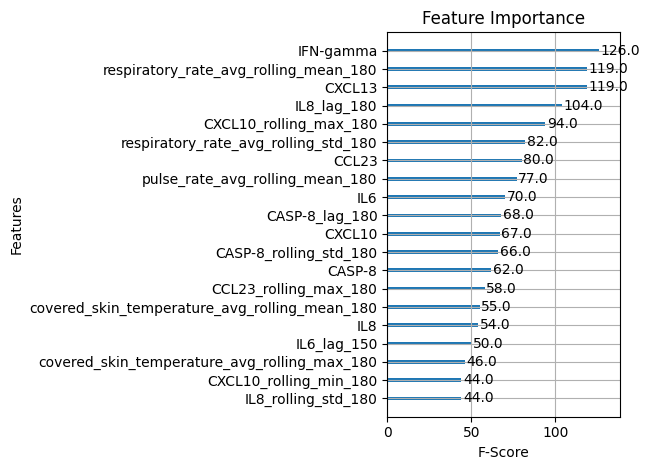

In [649]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=20)  # Show top 20 features
plt.title('Feature Importance')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [650]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import xgboost as xgb

# Step 2: Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Step 3: Convert to XGBoost DMatrix
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 4: Define XGBoost Parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Step 5: Train the XGBoost Model
model = xgb.train(params, dtrain, num_boost_round=100)

# Step 6: Predict and Evaluate
y_prob = model.predict(dtest)  # Predicted probabilities
y_pred = (y_prob > 0.68).astype(int)  # Convert probabilities to binary predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))


Class distribution after oversampling:
CRS_in_6_hours
0    119524
1    119524
Name: count, dtype: int64


/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9448021016773002
AUC-ROC Score: 0.9623753872129925
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     29501
           1       0.93      0.68      0.78      5138

    accuracy                           0.94     34639
   macro avg       0.94      0.83      0.88     34639
weighted avg       0.94      0.94      0.94     34639



In [651]:
best_threshold, best_f1 = find_best_threshold_class1(y_test, y_prob, step=0.01)
best_threshold

np.float64(0.68)

In [652]:
X_train_resampled.dtypes


spo2_avg                        float64
pulse_rate_avg                  float64
respiratory_rate_avg            float64
covered_skin_temperature_avg    float64
IL8                             float64
                                 ...   
CXCL13_lag_180                  float64
CXCL13_rolling_mean_180         float64
CXCL13_rolling_std_180          float64
CXCL13_rolling_min_180          float64
CXCL13_rolling_max_180          float64
Length: 121, dtype: object

<Figure size 1000x800 with 0 Axes>

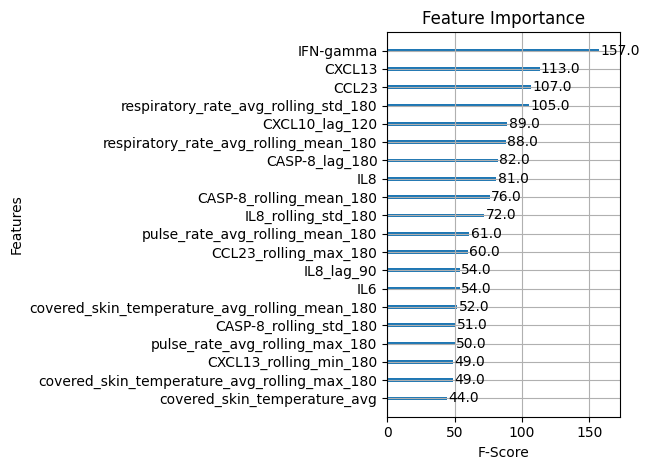

In [653]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=20)  # Show top 20 features
plt.title('Feature Importance')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


### Cross Validation

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from sklearn.model_selection import KFold
import numpy as np

# Group patients for cross-validation
unique_patients = data['PT_ID'].unique()
kf = KFold(n_splits=5, shuffle=False)  # No shuffling to respect time-series order

# Initialize variables to store metrics
cv_accuracies = []
cv_auc_scores = []
cv_classification_reports = []
aggregate_conf_matrix = np.array([[0, 0], [0, 0]])  # For binary classification

# Perform cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(unique_patients)):
    print(f"\nFold {fold + 1}/5")
    
    # Split patients into train and test for this fold
    train_patients = unique_patients[train_idx]
    test_patients = unique_patients[test_idx]
    
    # Create train and test datasets based on patient splits
    train_data = data[data['PT_ID'].isin(train_patients)]
    test_data = data[data['PT_ID'].isin(test_patients)]

    # # Retain the cutoff_date column to filter the data based on the cutoff
    # train_data = train_data[train_data['datetime'] < train_data['cutoff_date']]
    # test_data = test_data[test_data['datetime'] >= test_data['cutoff_date']]

    # Separate features and target
    X_train = train_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
    y_train = train_data['CRS_in_6_hours']

    X_test = test_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
    y_test = test_data['CRS_in_6_hours']
    
    # Handle class imbalance with Random Oversampling
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Convert to XGBoost DMatrix
    dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Define XGBoost Parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
    }
    
    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=100)
    
    # Predict on validation data
    y_prob = model.predict(dtest)
    y_pred = (y_prob > 0.01).astype(int)  # Adjust threshold if needed
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)  # Output as dict for aggregation
    
    # Print metrics for the current fold
    print("Accuracy:", accuracy)
    print("AUC-ROC Score:", auc_score)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Append metrics for aggregation
    cv_accuracies.append(accuracy)
    cv_auc_scores.append(auc_score)
    cv_classification_reports.append(class_report)
    aggregate_conf_matrix += conf_matrix  # Sum confusion matrices

# Aggregate results across folds
print("\nCross-Validation Results:")
print(f"Average Accuracy: {np.mean(cv_accuracies)}")
print(f"Average AUC-ROC: {np.mean(cv_auc_scores)}")
print(f"Aggregated confusion matrix: {aggregate_conf_matrix}")
print(f"Accuracy for class 0: {aggregate_conf_matrix[0][0]/(aggregate_conf_matrix[0][0]+aggregate_conf_matrix[0][1])}" )
print(f"Accuracy for class 1: {aggregate_conf_matrix[1][1]/(aggregate_conf_matrix[1][0]+aggregate_conf_matrix[1][1])}" )



Fold 1/5
Accuracy: 0.8043478260869565
AUC-ROC Score: 0.8630762828399797
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      7790
           1       0.16      0.34      0.21       674

    accuracy                           0.80      8464
   macro avg       0.55      0.59      0.55      8464
weighted avg       0.87      0.80      0.83      8464


Fold 2/5
Accuracy: 0.9199443531048438
AUC-ROC Score: 0.9233561725642141
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      7669
           1       0.27      0.94      0.41       238

    accuracy                           0.92      7907
   macro avg       0.63      0.93      0.69      7907
weighted avg       0.98      0.92      0.94      7907


Fold 3/5
Accuracy: 0.8962286249707191
AUC-ROC Score: 0.9880775175231636
Classification Report:
               precision    recall  f1-score   support



/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [655]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb
from sklearn.model_selection import KFold

def find_best_threshold_class1(y_true, y_prob, step=0.01):
    """
    Find the best threshold for maximizing F1-score for class 1 (minority class).
    
    Parameters:
        y_true (array-like): True labels (binary: 0 or 1).
        y_prob (array-like): Predicted probabilities for the positive class.
        step (float): Step size for threshold search. Default is 0.01.
    
    Returns:
        best_threshold (float): Threshold that gives the highest F1-score for class 1.
        best_f1 (float): The highest F1-score for class 1 achieved.
    """
    best_threshold = 0.0
    best_f1 = 0.0

    for threshold in np.arange(0, 1 + step, step):
        y_pred = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred, pos_label=1)  # F1 for class 1
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1


# Cross-validation with dynamic threshold optimization
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=False)

cv_best_thresholds = []
cv_f1_scores = []
cv_accuracies = []
cv_auc_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(unique_patients)):
    print(f"\nFold {fold + 1}/{n_splits}")
    
    # Split patients into train and test for this fold
    train_patients = unique_patients[train_idx]
    test_patients = unique_patients[test_idx]
    
    # Create train and test datasets based on patient splits
    train_data = data[data['PT_ID'].isin(train_patients)]
    test_data = data[data['PT_ID'].isin(test_patients)]

    # Retain the cutoff_date column to filter the data based on the cutoff
    train_data = train_data[train_data['datetime'] < train_data['cutoff_date']]
    test_data = test_data[test_data['datetime'] >= test_data['cutoff_date']]

    # Separate features and target
    X_train = train_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
    y_train = train_data['CRS_in_6_hours']

    X_test = test_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
    y_test = test_data['CRS_in_6_hours']
    
    # Handle class imbalance with Random Oversampling
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # Convert to XGBoost DMatrix
    dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Define XGBoost Parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
    }
    
    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=100)
    
    # Predict probabilities
    y_prob = model.predict(dtest)
    
    # Find the best threshold for this fold
    best_threshold, best_f1 = find_best_threshold_class1(y_test, y_prob, step=0.01)
    
    # Evaluate at the best threshold
    y_pred = (y_prob >= best_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    
    # Append metrics
    cv_best_thresholds.append(best_threshold)
    cv_f1_scores.append(best_f1)
    cv_accuracies.append(accuracy)
    cv_auc_scores.append(auc_score)
    
    # Print metrics for the current fold
    print(f"Best Threshold: {best_threshold}")
    print(f"F1-Score (Class 1): {best_f1}")
    print("Accuracy:", accuracy)
    print("AUC-ROC Score:", auc_score)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Aggregate results across folds
print("\nCross-Validation Results:")
print(f"Average Best Threshold: {np.mean(cv_best_thresholds)}")
print(f"Average F1-Score (Class 1): {np.mean(cv_f1_scores)}")
print(f"Average Accuracy: {np.mean(cv_accuracies)}")
print(f"Average AUC-ROC: {np.mean(cv_auc_scores)}")



Fold 1/5
Best Threshold: 0.12
F1-Score (Class 1): 0.3784261715296198
Accuracy: 0.9169423440453687
AUC-ROC Score: 0.8630762828399797
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7790
           1       0.47      0.32      0.38       674

    accuracy                           0.92      8464
   macro avg       0.71      0.64      0.67      8464
weighted avg       0.90      0.92      0.91      8464

Confusion Matrix:
 [[7547  243]
 [ 460  214]]

Fold 2/5
Best Threshold: 0.01
F1-Score (Class 1): 0.4144310823311748
Accuracy: 0.9199443531048438
AUC-ROC Score: 0.9233561725642141
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      7669
           1       0.27      0.94      0.41       238

    accuracy                           0.92      7907
   macro avg       0.63      0.93      0.69      7907
weighted avg       0.98      0.92      0.

/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Patients split

In [656]:
unique_patients = data['PT_ID'].unique()

# Split patients into 80% train and 20% test
train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

# Assign data to train and test sets based on the split
train_data = data[data['PT_ID'].isin(train_patients)]
test_data = data[data['PT_ID'].isin(test_patients)]

### (Add assumption)

def filter_test_data(test_data):
    """
    Filter the test data to include only rows from 6 hours before CRS occurrence
    (where 'CRS on date (0 No, 1 Yes)' changes from 0 to 1) until the CRS occurrence.
    
    Parameters:
        test_data (DataFrame): The test dataset including 'PT_ID', 'datetime', and 'CRS on date (0 No, 1 Yes)'.
    
    Returns:
        DataFrame: Filtered test data.
    """
    filtered_data = []

    # Group by patient
    for pt_id, group in test_data.groupby('PT_ID'):
        group = group.sort_values('datetime')  # Ensure chronological order
        
        # Find transitions from 0 to 1 in 'CRS on date (0 No, 1 Yes)'
        transition_indices = group.index[(group['CRS on date (0 No, 1 Yes)'].shift(1) == 0) & 
                                         (group['CRS on date (0 No, 1 Yes)'] == 1)]

        for idx in transition_indices:
            # Time of CRS occurrence
            crs_time = group.loc[idx, 'datetime']
            
            # Calculate the 6-hour window
            # start_time = crs_time - timedelta(hours=6)
            start_time = group['datetime'].min()
            
            # Filter rows within the 6-hour window
            filtered_group = group[(group['datetime'] >= start_time) & (group['datetime'] <= crs_time)]
            filtered_data.append(filtered_group)

    # Concatenate all filtered groups
    return pd.concat(filtered_data)

# Apply the filtering function to the test data
filtered_test_data = filter_test_data(test_data)



In [657]:
filtered_test_data

,PT_ID,"CRS on date (0 No, 1 Yes)",Agent (JNJ/BMS/Caribou),datetime,spo2_avg,pulse_rate_avg,respiratory_rate_avg,covered_skin_temperature_avg,IL8,IL6,...,CXCL13_lag_90,CXCL13_lag_120,CXCL13_lag_150,CXCL13_lag_180,CXCL13_rolling_mean_180,CXCL13_rolling_std_180,CXCL13_rolling_min_180,CXCL13_rolling_max_180,CRS_in_6_hours,cutoff_date
12428,7005,0,JNJ OOS,2022-12-07 21:27:00,0.00,0.00,0.00,0.00,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0,2022-12-17 09:32:36
12429,7005,0,JNJ OOS,2022-12-07 21:28:00,0.00,-0.84,-0.66,0.13,-0.000018,-0.000124,...,NaN,NaN,NaN,NaN,-0.000025,0.000035,-0.000049,0.000000,0,2022-12-17 09:32:36
12430,7005,0,JNJ OOS,2022-12-07 21:29:00,0.00,-0.49,-0.33,0.28,-0.000037,-0.000249,...,NaN,NaN,NaN,NaN,-0.000049,0.000049,-0.000098,0.000000,0,2022-12-17 09:32:36
12431,7005,0,JNJ OOS,2022-12-07 21:30:00,0.18,0.07,-0.68,0.41,-0.000055,-0.000373,...,NaN,NaN,NaN,NaN,-0.000074,0.000063,-0.000147,0.000000,0,2022-12-17 09:32:36
12432,7005,0,JNJ OOS,2022-12-07 21:31:00,-0.38,-0.84,-0.51,0.53,-0.000073,-0.000498,...,NaN,NaN,NaN,NaN,-0.000098,0.000078,-0.000196,0.000000,0,2022-12-17 09:32:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148640,7027,0,JNJ,2023-09-26 07:26:00,14.80,9.13,11.71,3.79,1.139463,5.104005,...,1.619022,1.606806,1.594591,1.582375,1.619226,0.021217,1.582782,1.655669,1,2023-10-01 19:56:00
148641,7027,0,JNJ,2023-09-26 07:27:00,15.30,8.17,8.99,3.79,1.140536,5.108589,...,1.619429,1.607214,1.594998,1.582782,1.619633,0.021217,1.583189,1.656076,1,2023-10-01 19:56:00
148642,7027,0,JNJ,2023-09-26 07:28:00,15.90,8.44,11.95,3.77,1.141609,5.113173,...,1.619836,1.607621,1.595405,1.583189,1.620040,0.021217,1.583597,1.656484,1,2023-10-01 19:56:00
148643,7027,0,JNJ,2023-09-26 07:29:00,17.86,7.64,9.30,3.77,1.142682,5.117757,...,1.620244,1.608028,1.595812,1.583597,1.620447,0.021217,1.584004,1.656891,1,2023-10-01 19:56:00


In [658]:
filtered_test_data[filtered_test_data['CRS_in_6_hours']==0][['PT_ID','datetime','CRS on date (0 No, 1 Yes)','CRS_in_6_hours']]

,PT_ID,datetime,"CRS on date (0 No, 1 Yes)",CRS_in_6_hours
12428,7005,2022-12-07 21:27:00,0,0
12429,7005,2022-12-07 21:28:00,0,0
12430,7005,2022-12-07 21:29:00,0,0
12431,7005,2022-12-07 21:30:00,0,0
12432,7005,2022-12-07 21:31:00,0,0
...,...,...,...,...
148279,7027,2023-09-26 01:25:00,0,0
148280,7027,2023-09-26 01:26:00,0,0
148281,7027,2023-09-26 01:27:00,0,0
148282,7027,2023-09-26 01:28:00,0,0


In [659]:
filtered_test_data[(filtered_test_data.PT_ID==7005) & (filtered_test_data['CRS on date (0 No, 1 Yes)'])==0][['datetime','CRS on date (0 No, 1 Yes)','CRS_in_6_hours']]

,datetime,"CRS on date (0 No, 1 Yes)",CRS_in_6_hours
12428,2022-12-07 21:27:00,0,0
12429,2022-12-07 21:28:00,0,0
12430,2022-12-07 21:29:00,0,0
12431,2022-12-07 21:30:00,0,0
12432,2022-12-07 21:31:00,0,0
...,...,...,...
148640,2023-09-26 07:26:00,0,1
148641,2023-09-26 07:27:00,0,1
148642,2023-09-26 07:28:00,0,1
148643,2023-09-26 07:29:00,0,1


In [660]:
# Separate features and target
X_train = train_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
y_train = train_data['CRS_in_6_hours']

X_test = filtered_test_data.drop(columns=['PT_ID', 'datetime', 'CRS on date (0 No, 1 Yes)', 'Agent (JNJ/BMS/Caribou)', 'CRS_in_6_hours', 'cutoff_date'])
y_test = filtered_test_data['CRS_in_6_hours']

In [661]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, classification_report
# Step 2: Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Step 3: Convert to XGBoost DMatrix
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 4: Define XGBoost Parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Step 5: Train the XGBoost Model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = (model.predict(dtest) > 0.68).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Predict probabilities for AUC-ROC
y_prob = model.predict(dtest)
#auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)



Class distribution after oversampling:
CRS_in_6_hours
0    97194
1    97194
Name: count, dtype: int64


/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9525441957383881
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     14155
           1       0.51      0.50      0.51       722

    accuracy                           0.95     14877
   macro avg       0.74      0.74      0.74     14877
weighted avg       0.95      0.95      0.95     14877

AUC-ROC Score: 0.9464910400342831


In [662]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, classification_report

# Convert data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train  # Target variable in the training set
)

# Set the scale_pos_weight parameter in XGBoost
scale_pos_weight = class_weights[1] / class_weights[0]

# XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'scale_pos_weight': scale_pos_weight  # Add the class imbalance weight
}

# Train the XGBoost model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params, dtrain, num_boost_round=100)


# Make predictions
y_pred = (model.predict(dtest) > 0.49).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Predict probabilities for AUC-ROC
y_prob = model.predict(dtest)
#auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)



/Users/a123/Desktop/CMU/Capstone/CRS-Detection/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9557034348322915
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     14155
           1       0.55      0.50      0.52       722

    accuracy                           0.96     14877
   macro avg       0.76      0.74      0.75     14877
weighted avg       0.95      0.96      0.95     14877

AUC-ROC Score: 0.9464910400342831


### Model Finetuning

In [663]:
from sklearn.metrics import f1_score

def evaluate_model_with_weights(X_train, X_test, y_train, y_test, selected_features, scale_pos_weight):
    # Create XGBoost DMatrix for the selected features
    dtrain = xgb.DMatrix(X_train[selected_features], label=y_train)
    dtest = xgb.DMatrix(X_test[selected_features], label=y_test)

    # Define XGBoost parameters (include scale_pos_weight)
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
        'scale_pos_weight': scale_pos_weight,
    }

    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Predict probabilities and calculate F1-score for the minority class
    y_prob = model.predict(dtest)
    y_pred = (y_prob > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=1)  # F1-score for minority class
    return f1


In [664]:
# from itertools import combinations
# import numpy as np

# # Define all available features
# all_features = X_train.columns.tolist()

# # Initialize variables to store the best combination and its score
# best_features = None
# best_f1 = -np.inf

# # Iterate over feature subsets
# for r in range(1, len(all_features) + 1):  # From 1 feature to all features
#     for subset in combinations(all_features, r):
#         # Evaluate the model with the current subset of features
#         f1 = evaluate_model_with_weights(
#             X_train=X_train,
#             X_test=X_test,
#             y_train=y_train,
#             y_test=y_test,
#             selected_features=list(subset),
#             scale_pos_weight=scale_pos_weight
#         )
        
#         # Update the best combination if the current subset performs better
#         if f1 > best_f1:
#             best_f1 = f1
#             best_features = subset

# # Display the best feature subset and its F1-score
# print(f"Best Features: {best_features}")
# print(f"Best F1-Score: {best_f1}")


In [665]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Define the feature selection method
def recursive_feature_elimination(X_train, X_test, y_train, y_test, scale_pos_weight, step=1):
    """
    Perform Recursive Feature Elimination (RFE) to select the most relevant features.
    """
    # Initialize the XGBoost model
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
        'scale_pos_weight': scale_pos_weight,
    }
    
    model = xgb.XGBClassifier(**params)

    # Use RFE to select features
    rfe = RFE(estimator=model, step=step)
    rfe = rfe.fit(X_train, y_train)

    # Get the selected features
    selected_features = X_train.columns[rfe.support_]

    # Evaluate model with selected features
    dtrain = xgb.DMatrix(X_train[selected_features], label=y_train)
    dtest = xgb.DMatrix(X_test[selected_features], label=y_test)

    final_model = xgb.train(params, dtrain, num_boost_round=100)
    y_prob = final_model.predict(dtest)
    y_pred = (y_prob > 0.49).astype(int)

    # Calculate F1-score for minority class
    f1 = f1_score(y_test, y_pred, pos_label=1)
    return selected_features, f1

# Apply RFE
selected_features, best_f1 = recursive_feature_elimination(X_train, X_test, y_train, y_test, scale_pos_weight)
print(f"Selected Features: {selected_features}")
print(f"Best F1-Score: {best_f1}")


Selected Features: Index(['IL8', 'IL6', 'CXCL10', 'IFN-gamma', 'CCL23', 'CASP-8', 'CXCL13',
       'spo2_avg_lag_150', 'spo2_avg_rolling_mean_180',
       'spo2_avg_rolling_min_180', 'pulse_rate_avg_rolling_mean_180',
       'pulse_rate_avg_rolling_min_180', 'pulse_rate_avg_rolling_max_180',
       'respiratory_rate_avg_rolling_mean_180',
       'respiratory_rate_avg_rolling_max_180',
       'covered_skin_temperature_avg_rolling_mean_180',
       'covered_skin_temperature_avg_rolling_min_180',
       'covered_skin_temperature_avg_rolling_max_180', 'IL8_lag_30',
       'IL8_lag_60', 'IL8_lag_120', 'IL8_lag_180', 'IL8_rolling_std_180',
       'IL8_rolling_min_180', 'IL6_lag_30', 'IL6_lag_120', 'IL6_lag_150',
       'IL6_rolling_mean_180', 'IL6_rolling_std_180', 'CXCL10_lag_30',
       'CXCL10_lag_60', 'CXCL10_lag_90', 'CXCL10_lag_180',
       'CXCL10_rolling_min_180', 'CXCL10_rolling_max_180', 'IFN-gamma_lag_30',
       'IFN-gamma_lag_60', 'IFN-gamma_lag_90', 'IFN-gamma_lag_180',
       

In [666]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assume `best_features` contains the list of selected features from the feature selection process

# Filter the training and testing data to include only the best features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Calculate class weights for the training data
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train  # Target variable in the training set
)
scale_pos_weight = class_weights[1] / class_weights[0]  # Class imbalance adjustment

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'scale_pos_weight': scale_pos_weight,  # Handle class imbalance
}

# Train the model with selected features
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions with the new model
y_prob = model.predict(dtest)
y_pred = (y_prob > 0.96).astype(int)  # Threshold can be adjusted as needed

# Evaluate the new model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate AUC-ROC
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)


Accuracy: 0.9616186059017275
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     14155
           1       0.63      0.49      0.56       722

    accuracy                           0.96     14877
   macro avg       0.80      0.74      0.77     14877
weighted avg       0.96      0.96      0.96     14877

AUC-ROC Score: 0.8618344975640686


In [667]:
best_threshold, best_f1 = find_best_threshold_class1(y_test, y_prob, step=0.01)
best_threshold

np.float64(0.96)

In [668]:
best_f1

np.float64(0.5556420233463035)